In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#these block of codes imports the needed libraries to create my chosen algorithm


In [2]:
airbnb_df = pd.read_csv("C:\\Users\\kayod\\AB_NYC_2019.csv\\AB_NYC_2019.csv")
# Creates a DataFrame from  the CSV file
airbnb_df.head(5)
# First 5 rows of the DataFrame

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
airbnb_df.shape #prints out the amount of rows and columns present in the read csv file

(48895, 16)

In [4]:
airbnb_df.info() # gives an wholistic information about the shape of the csv file and data types contained in each column of the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
airbnb_df['last_review'] = pd.to_datetime(airbnb_df['last_review'])
#To perform calculations on the dates, it is necessary to change the data type of dates in 'last review' from object to datetime data type

In [6]:
#changing neighbourhood_group,neighbourhood,room_type data type from object to category type

airbnb_df['neighbourhood_group'] = airbnb_df['neighbourhood_group'].astype('category')
airbnb_df['neighbourhood'] = airbnb_df['neighbourhood'].astype('category')
airbnb_df['room_type'] = airbnb_df['room_type'].astype('category')

#checking to see the effect of the changed data type in 'neighbourhood_group' column
airbnb_df['neighbourhood_group'].values

['Brooklyn', 'Manhattan', 'Manhattan', 'Brooklyn', 'Manhattan', ..., 'Brooklyn', 'Brooklyn', 'Manhattan', 'Manhattan', 'Manhattan']
Length: 48895
Categories (5, object): ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']

In [7]:
# Check the data types
airbnb_df.dtypes

id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                     category
neighbourhood                           category
latitude                                 float64
longitude                                float64
room_type                               category
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
dtype: object

In [8]:
#Remove deplicates
airbnb_df.drop_duplicates(inplace =True)
airbnb_df.duplicated().sum()

0

In [9]:
#checking for null values in each column of the dataset
airbnb_df.isnull().sum() 

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [10]:
#dropping unnecessary columns
airbnb_df.drop([ 'name', 'id', 'host_name', 'last_review'], axis=1, inplace=True)
print(airbnb_df.columns)

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')


In [11]:
airbnb_df.head() #checking to verify dropped columns

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [12]:
airbnb_df.fillna({'reviews_per_month': 0}, inplace=True)

In [13]:
airbnb_df.isnull().sum()
airbnb_df.dropna(how='any',inplace=True)
airbnb_df.info() #.info() function is used to get a concise summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   host_id                         48895 non-null  int64   
 1   neighbourhood_group             48895 non-null  category
 2   neighbourhood                   48895 non-null  category
 3   latitude                        48895 non-null  float64 
 4   longitude                       48895 non-null  float64 
 5   room_type                       48895 non-null  category
 6   price                           48895 non-null  int64   
 7   minimum_nights                  48895 non-null  int64   
 8   number_of_reviews               48895 non-null  int64   
 9   reviews_per_month               48895 non-null  float64 
 10  calculated_host_listings_count  48895 non-null  int64   
 11  availability_365                48895 non-null  int64   
dtypes: category(3), fl

In [14]:
 #check finally if there are still any null values, if not, then the data is properly cleaned and set for creating an algorithm
airbnb_df.isnull().sum() 

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

Text(0.5, 1.0, 'Room Type vs Price')

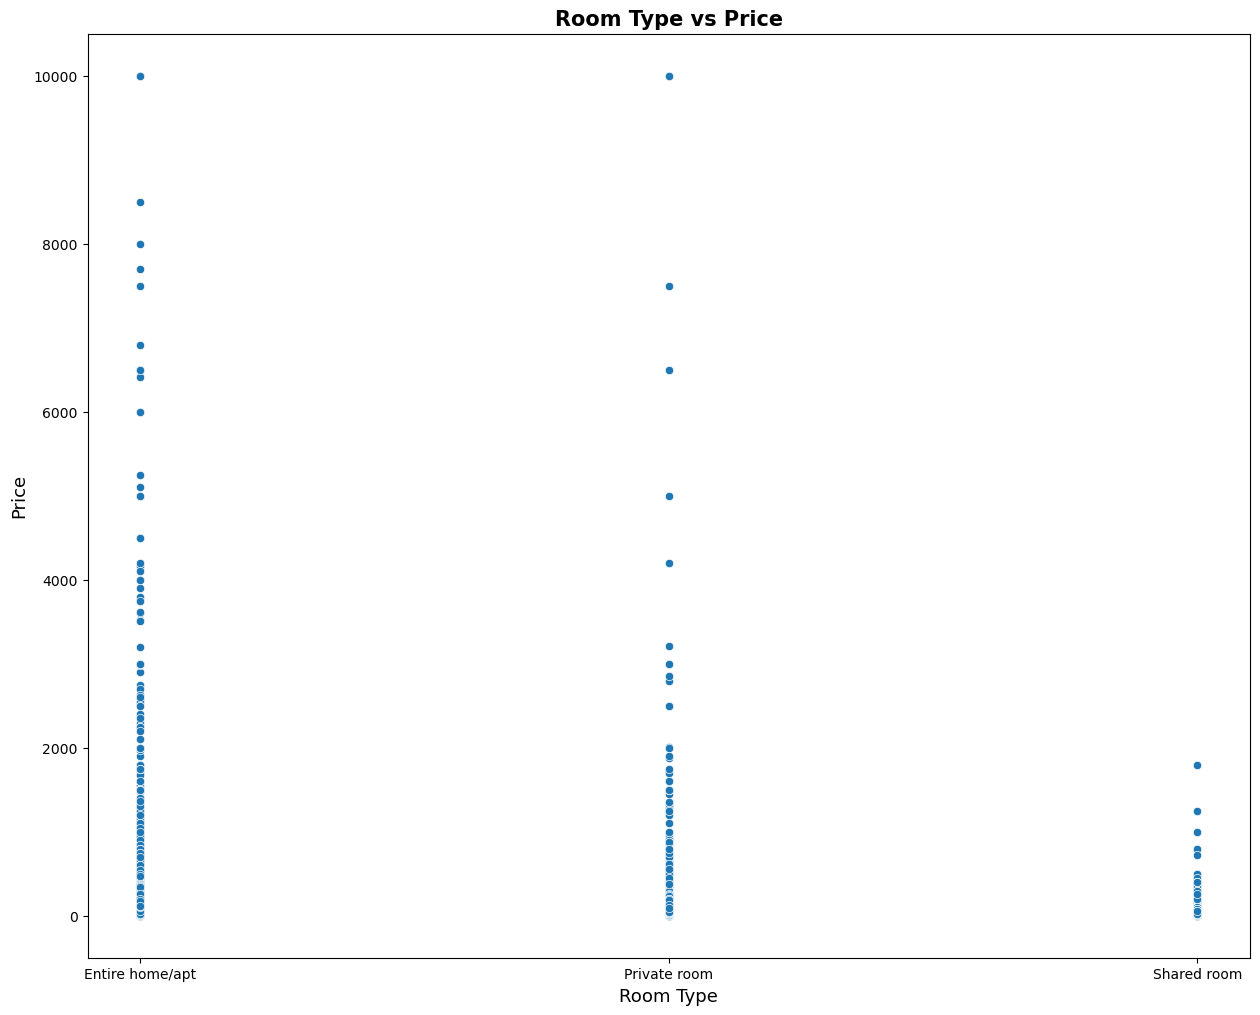

In [15]:
#Relationship between price and room type
plt.figure(figsize=(15,12))
sns.scatterplot(x='room_type', y='price', data=airbnb_df)

plt.xlabel("Room Type", size=13)
plt.ylabel("Price", size=13)
plt.title("Room Type vs Price",size=15, weight='bold')

Text(0.5, 1.0, 'Room Type vs Price vs Neighbourhood Group')

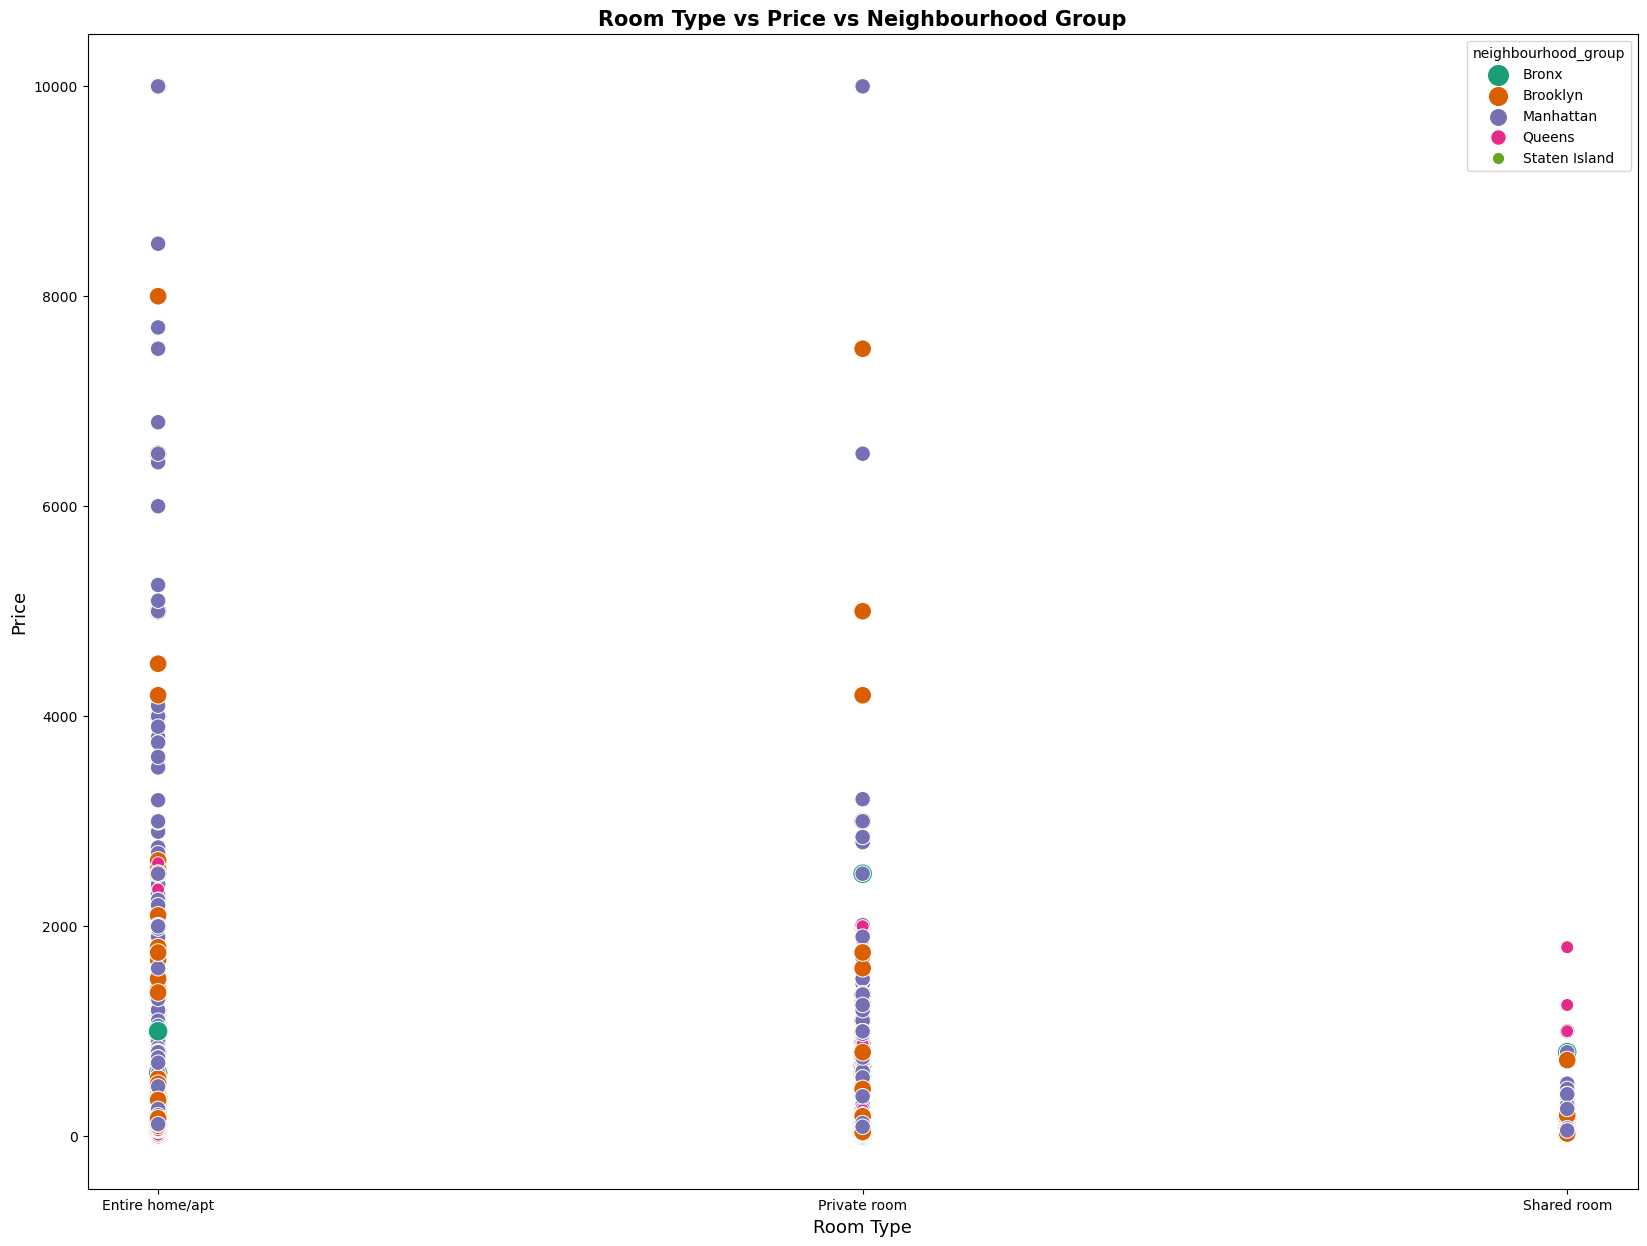

In [16]:
 plt.figure(figsize=(20,15))
sns.scatterplot(x="room_type", y="price",
            hue="neighbourhood_group", size="neighbourhood_group",
            sizes=(50, 200), palette="Dark2", data=airbnb_df)

plt.xlabel("Room Type", size=13)
plt.ylabel("Price", size=13)
plt.title("Room Type vs Price vs Neighbourhood Group",size=15, weight='bold')

Text(0.5, 1.0, 'Price vs Number of Reviews vs Neighbourhood Group')

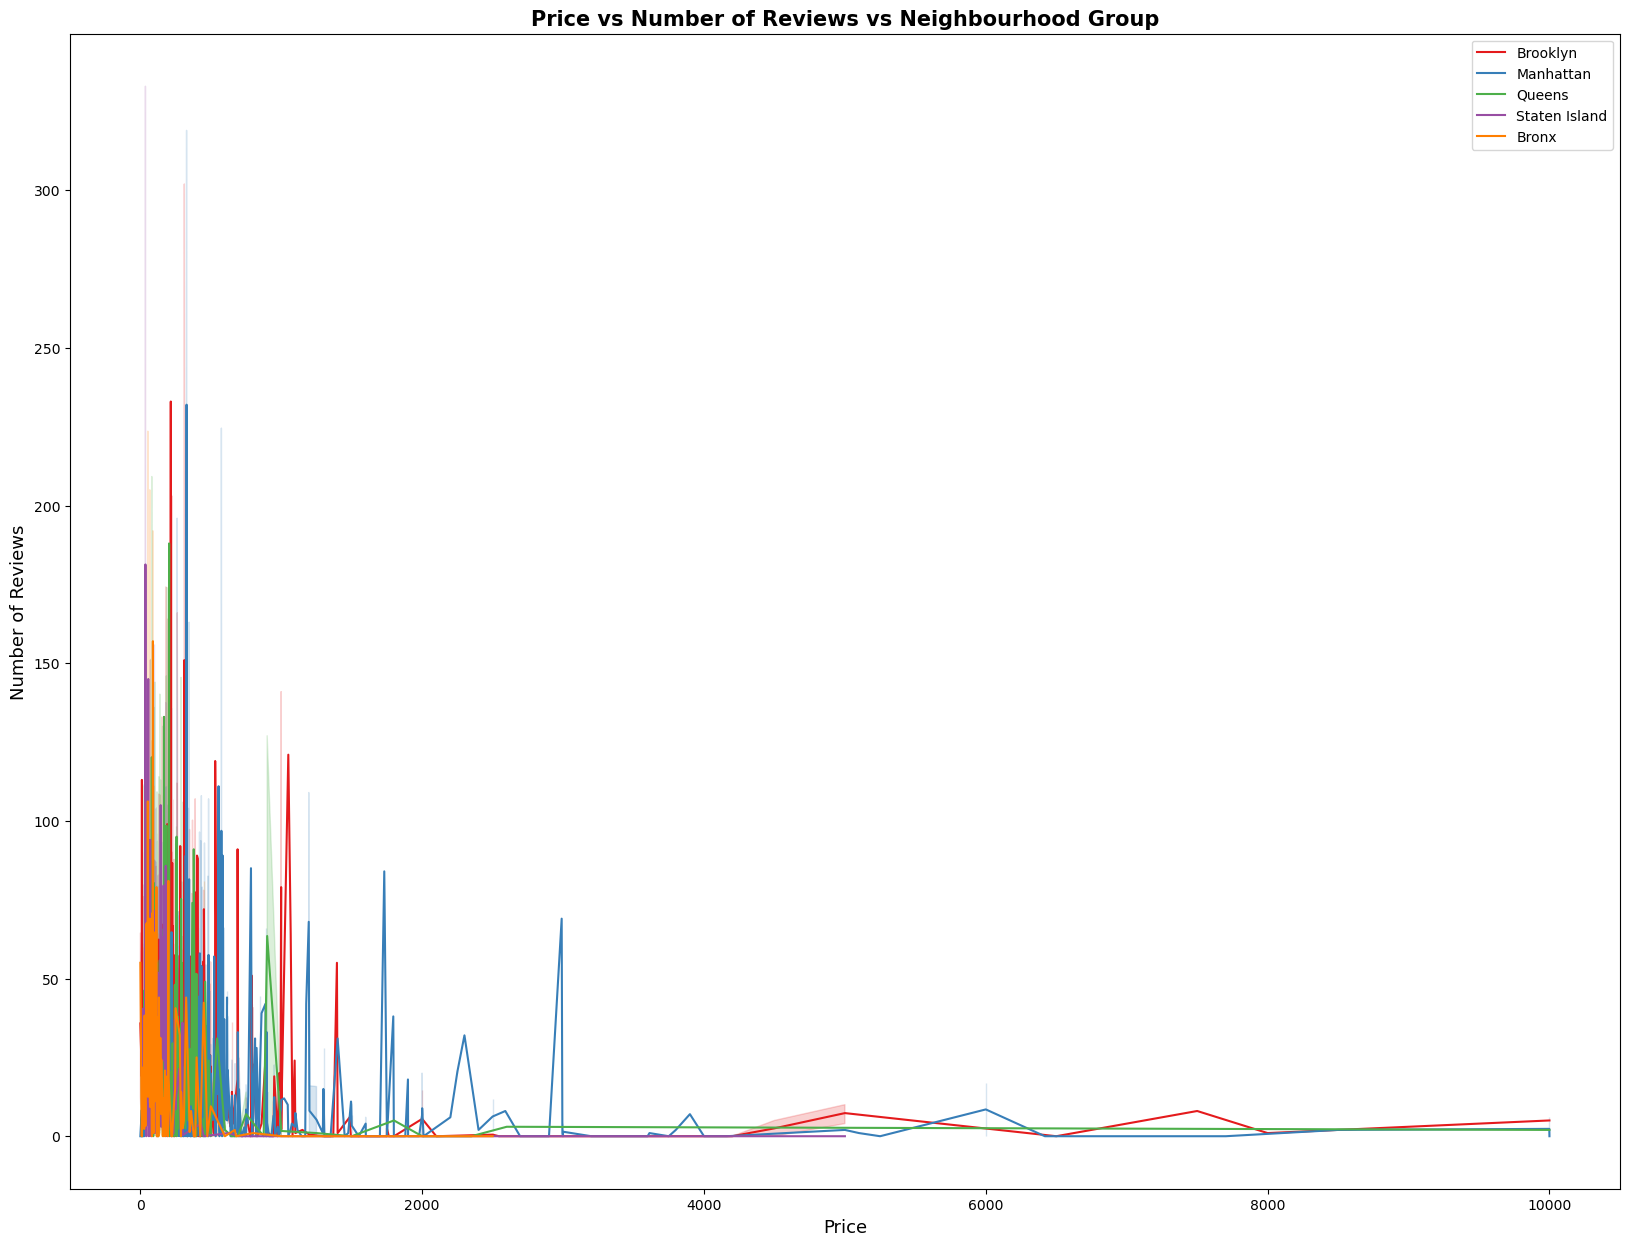

In [17]:
plt.figure(figsize=(20,15))
sns.set_palette("Set1")

sns.lineplot(x='price', y='number_of_reviews', 
             data=airbnb_df[airbnb_df['neighbourhood_group']=='Brooklyn'],
             label='Brooklyn')
sns.lineplot(x='price', y='number_of_reviews', 
             data=airbnb_df[airbnb_df['neighbourhood_group']=='Manhattan'],
             label='Manhattan')
sns.lineplot(x='price', y='number_of_reviews', 
             data=airbnb_df[airbnb_df['neighbourhood_group']=='Queens'],
             label='Queens')
sns.lineplot(x='price', y='number_of_reviews', 
             data=airbnb_df[airbnb_df['neighbourhood_group']=='Staten Island'],
             label='Staten Island')
sns.lineplot(x='price', y='number_of_reviews', 
             data=airbnb_df[airbnb_df['neighbourhood_group']=='Bronx'],
             label='Bronx')
plt.xlabel("Price", size=13)
plt.ylabel("Number of Reviews", size=13)
plt.title("Price vs Number of Reviews vs Neighbourhood Group",size=15, weight='bold')

C:\Users\kayod\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='neighbourhood_group', ylabel='price'>

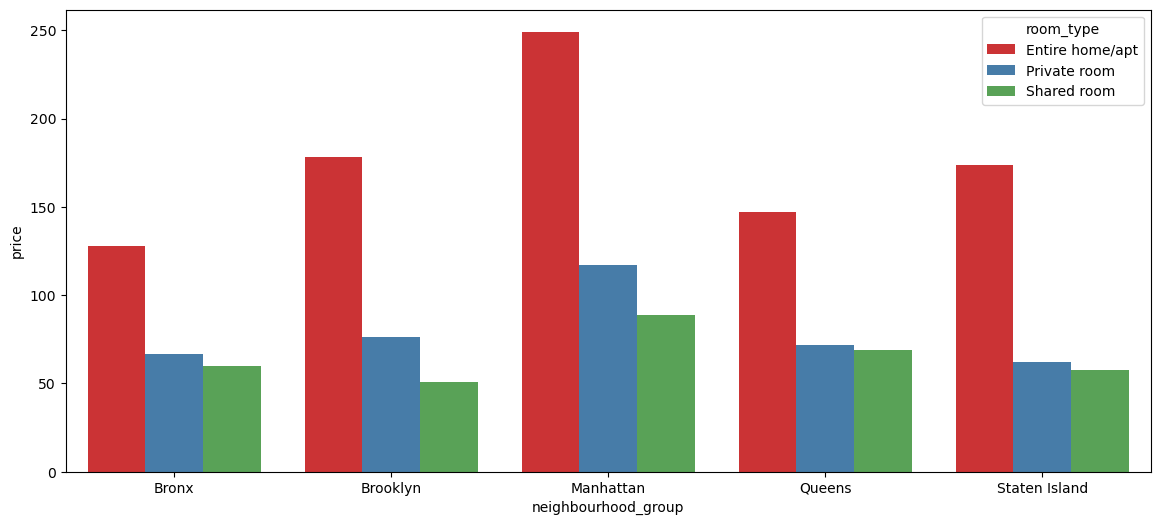

In [18]:
#better understanding of the relationships using a barplot
plt.figure(figsize=(14, 6))
sns.barplot(airbnb_df.neighbourhood_group, airbnb_df.price, hue=airbnb_df.room_type, ci=None)

C:\Users\kayod\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Price Distribution Plot')

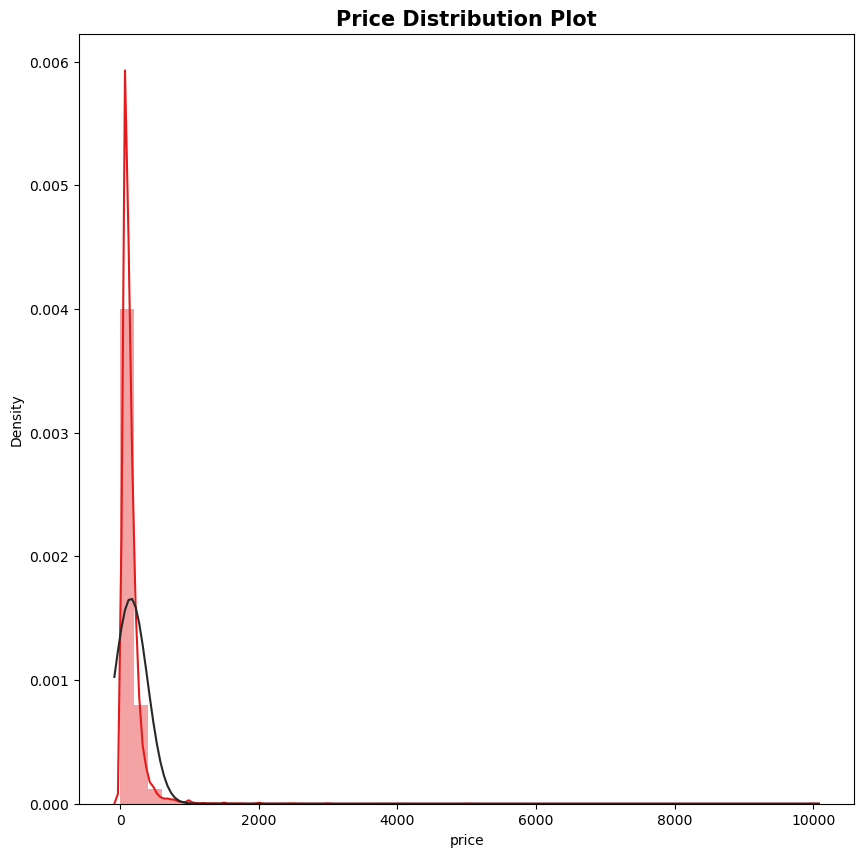

In [19]:
plt.figure(figsize=(10,10))
sns.distplot(airbnb_df['price'], fit= norm)
plt.title("Price Distribution Plot",size=15, weight='bold') #price distribution plot to see if price dist is normal or skewed

In [20]:
#we can see the price distribution is skewed to the right, and its not a normal distribution
#apparently most of the prices fall within the first $1500.
#investigating further with .describe() to view the statistics of the data frame
airbnb_df.describe()


,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


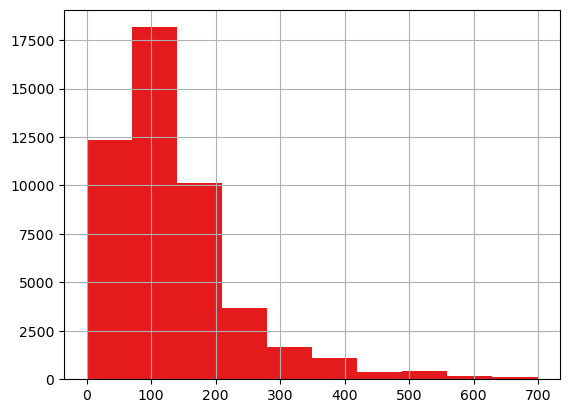

In [24]:
#The max price(10000) is not even within 3 standard deviations from the mean, showing its an outlier
#vitualizing further using histogram plot to see the prices within 1000 due to the results shown on the stat table
### Lets plot histogram for prices less than $1000
hist_price1=airbnb_df["price"][airbnb_df["price"]<700].hist()



In [25]:
#Handling outliers by removing entries having price > 1000
airbnb_df = airbnb_df[airbnb_df["price"]<1000]
airbnb_df.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [26]:
# Select numeric columns
airbnb_df_numeric = airbnb_df.select_dtypes(include=[np.number])

for col in airbnb_df_numeric.columns:
    # Calculate z-score of the column
    z_score = np.abs(stats.zscore(airbnb_df[col]))
    outliers_num = len(np.where(z_score > 3)[0])
    if outliers_num:
        print('{}: {}'.format(col, outliers_num))

latitude: 98
longitude: 1222
price: 1072
minimum_nights: 311
number_of_reviews: 1203
reviews_per_month: 841
calculated_host_listings_count: 678


In [29]:
#Handling outliers using Z_score
z_scores = np.abs(stats.zscore(airbnb_df_numeric))

# DataFrame without outliers
airbnb_df_wo_outliers = airbnb_df[(z_scores < 3).all(axis=1)]
airbnb_df_wo_outliers.shape

(43569, 12)

In [37]:
#Linear regression analysis to predict the price
#The required liberies were already imported at the start of this code
#drop unneceassy columns
airbnb_df.drop(['latitude','longitude','neighbourhood','number_of_reviews','reviews_per_month'], axis = 1, inplace = True)
 

In [38]:
 airbnb_df.head()

,host_id,neighbourhood_group,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Private room,149,1,6,365
1,2845,Manhattan,Entire home/apt,225,1,2,355
2,4632,Manhattan,Private room,150,3,1,365
3,4869,Brooklyn,Entire home/apt,89,1,1,194
4,7192,Manhattan,Entire home/apt,80,10,1,0


In [39]:
#Encode the input Variables
def Encode(airbnb_df):
    for column in airbnb_df.columns[airbnb_df.columns.isin(['neighbourhood_group', 'room_type'])]:
        airbnb_df[column] = airbnb_df[column].factorize()[0]
    return airbnb_df

airbnb_df = Encode(airbnb_df.copy())

In [40]:
X = airbnb_df.iloc[:,[0,1,3,4,5]]
y = airbnb_df['price']

In [41]:
#splitting the dataset into test and training data
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.2, random_state= 42)

In [42]:
print('Dimensions of the training feature matrix: {}'.format(X_train.shape))
print('Dimensions of the training target vector: {}'.format(y_train.shape))
print('Dimensions of the test feature matrix: {}'.format(X_test.shape))
print('Dimensions of the test target vector: {}'.format(y_test.shape))

Dimensions of the training feature matrix: (38877, 5)
Dimensions of the training target vector: (38877,)
Dimensions of the test feature matrix: (9720, 5)
Dimensions of the test target vector: (9720,)


In [43]:
#Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

R2 score: 99.68028544932342
RMSE: 6.125731740274419
MAE: 3.7149578005777815
   Actual Values  Predicted Values
0             60         58.193371
1            100        100.289414
2             28         24.516535
3             55         52.931365
4            220        226.577546


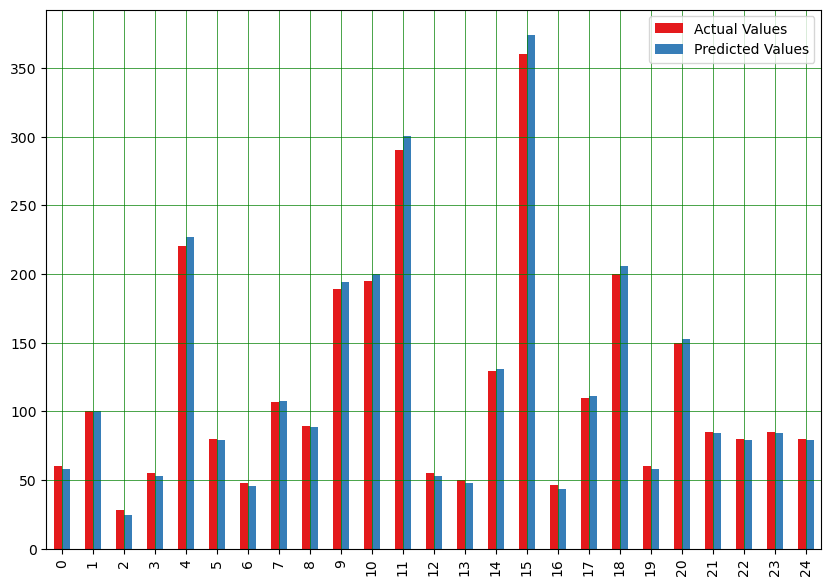

In [44]:
# Model building
# Prepare a Linear Regression Model

reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

# R2 score
print("R2 score:", r2_score(y_test, y_pred) * 100)

# RMSE
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

# MAE
print("MAE:", mean_absolute_error(y_test, y_pred))

# Error
error_diff = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': y_pred.flatten()})
print(error_diff.head(5))

# Visualize the error
df1 = error_diff.head(25)
df1.plot(kind='bar', figsize=(10, 7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


C:\Users\kayod\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Price Distribution Plot')

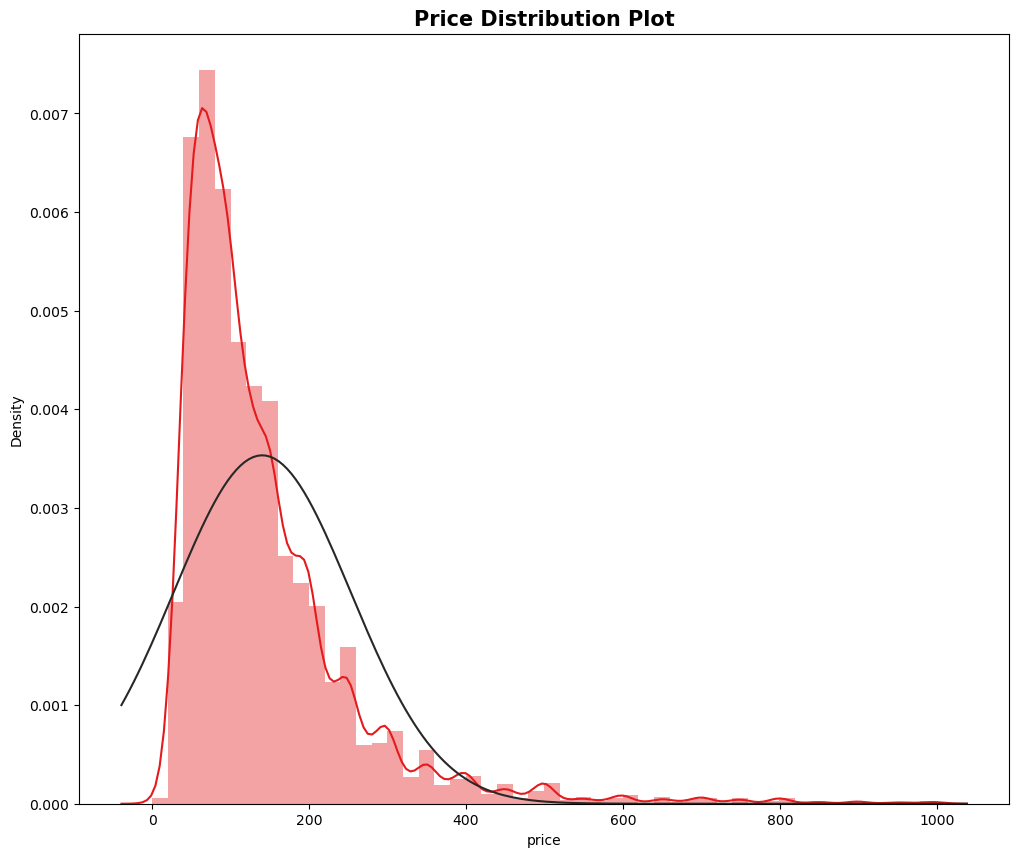

In [45]:
plt.figure(figsize=(12,10))
sns.distplot(airbnb_df['price'], fit=norm)
plt.title("Price Distribution Plot",size=15, weight='bold')

R2 score:  99.68787180616863
RMSE:  6.052618106773127
MAE:  3.666496791103273
   Actual Values  Predicted Values
0             60              58.0
1            100             100.0
2             28              25.0
3             55              53.0
4            220             227.0


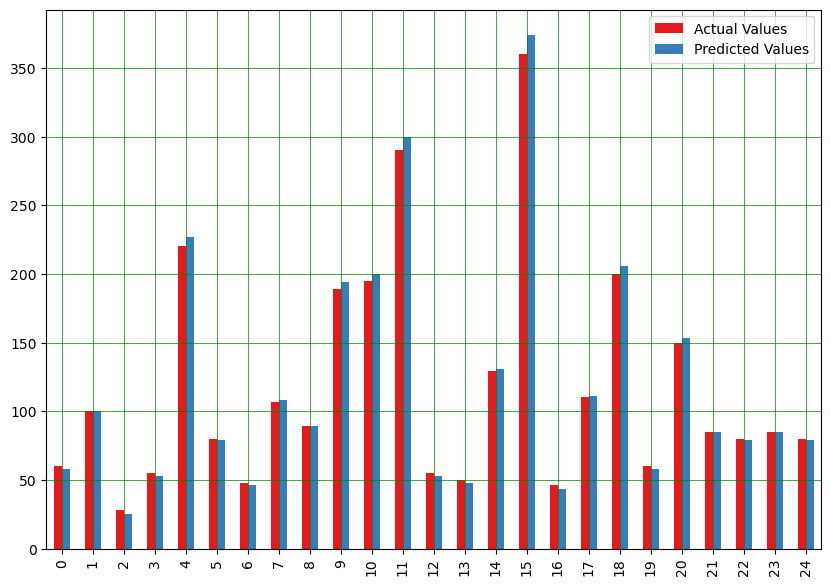

In [46]:
#Prepairng a Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(X_train,y_train)
y_pred=DTree.predict(X_test)

from sklearn.metrics import r2_score
print("R2 score: ",r2_score(y_test,y_pred)*100)
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE: ", mean_absolute_error(y_test, y_pred))

#Error
error_diff = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': y_pred.flatten()})
print(error_diff.head(5))

#Visualize the error
df1 = error_diff.head(25)
df1.plot(kind='bar',figsize=(10,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()